# Inception

With computational efficiency in mind, Google proposed a new ConvNet model in [Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842) named Inception.

## Abstract

This notebook explores the inception paper and model architecture as well as its implementation in Keras.

## Table of Contents

>[Inception](#scrollTo=5X6wb1rI0_gU)

>>[Abstract](#scrollTo=gQ07isAV0_d5)

>>[Table of Contents](#scrollTo=9YBxtjzd0_bT)

>>[Introduction](#scrollTo=r7MzfBOq3JiH)

>>[Model Architecture](#scrollTo=WMXS5-2qcb6d)

>>>[Stem Layers](#scrollTo=hMfFhcXA3K_v)

>>>[Inception Module](#scrollTo=oeIJINqI8orT)

>>>>[Naive Inception](#scrollTo=oeIJINqI8orT)

>>>>[Inception with Dimensionality Reduction](#scrollTo=oeIJINqI8orT)

>>>[1x1 Convolutions](#scrollTo=F6kKQPZQR060)

>>>[Global Average Pooling](#scrollTo=LV2DL90mch8p)



## Introduction

The most straightforward way of improving the performance of deep neural networks is by increasing their size. This includes both increasing the depth – the number of levels – of the network and its
width: the number of units at each level. However this
simple solution comes with two major drawbacks.

- Bigger size typically means a larger number of parameters, which makes the enlarged network more prone to overfitting.

- Increased use of computational resources.

Inception carefully crafted design allows for increasing the depth and width of the network while keeping the computational budget constant.

## Model Architecture

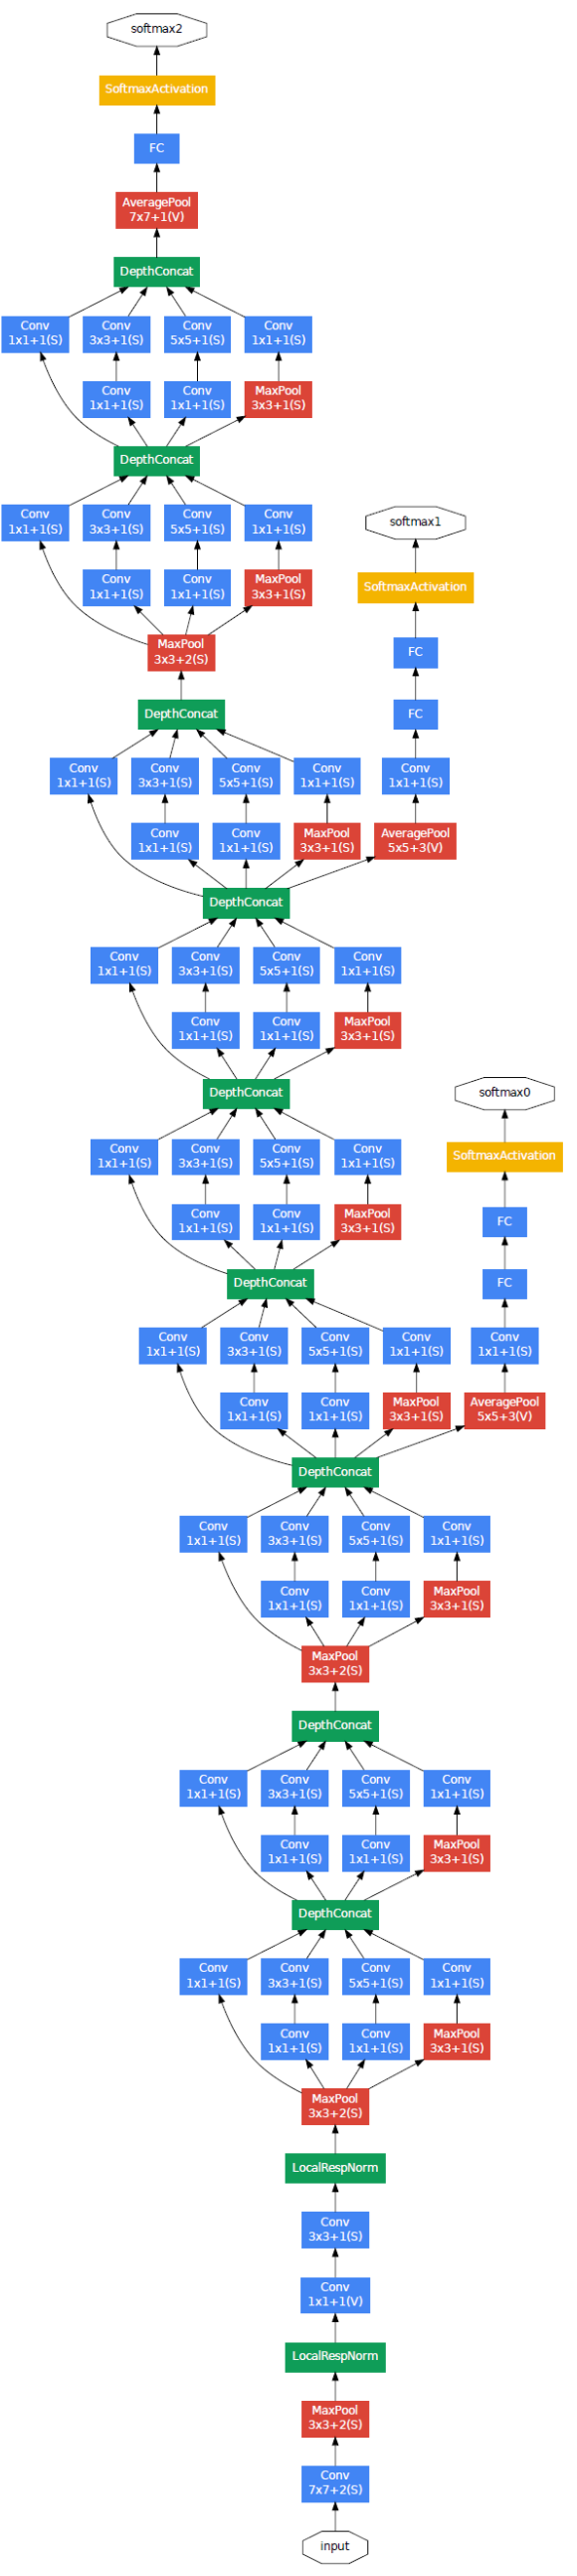

### Stem Layers
Initial stem layers aggressively downsample the input image from (224x224) to (28x28) through 5 layers of strided convolutions and max-pooling.



### Inception Module

#### Naive Inception
Salient parts in the image can have extremely large variation in size. Because of this huge variation in the location of the information, choosing the right kernel size for the convolution operation becomes difficult. An inception module applies filters with multiple sizes operate on the same level, making the network wider as well as deeper.


#### Inception with Dimensionality Reduction
One big problem with the above modules, at least in this naive form, is that even a modest number of
5×5 convolutions can be prohibitively expensive on top of a convolutional layer with a large number
of filters. This problem becomes even more pronounced once pooling units are added to the mix:
their number of output filters equals to the number of filters in the previous stage. The merging of
the output of the pooling layer with the outputs of convolutional layers would lead to an inevitable increase in the number of outputs from stage to stage. Even while this architecture might cover the
optimal sparse structure, it would do it very inefficiently, leading to a computational blow up within
a few stages.
This leads to the second idea of the proposed architecture: judiciously applying dimension reductions and projections wherever the computational requirements would increase too much otherwise.

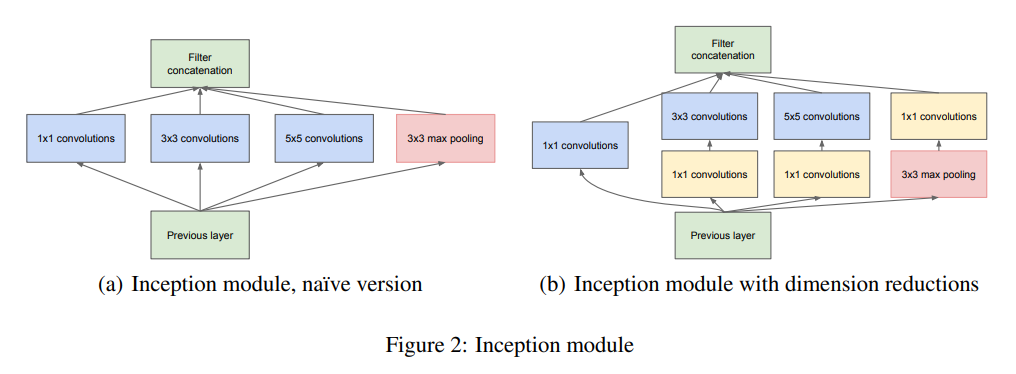

### 1x1 Convolutions

While pooling can be used to reduce the dimensionality of the width and height of activation maps, 1x1 convolutions perform a similar dimensionality reduction across the number of channels (depth) of the activation maps. In other words, they perform channel-wise pooling.

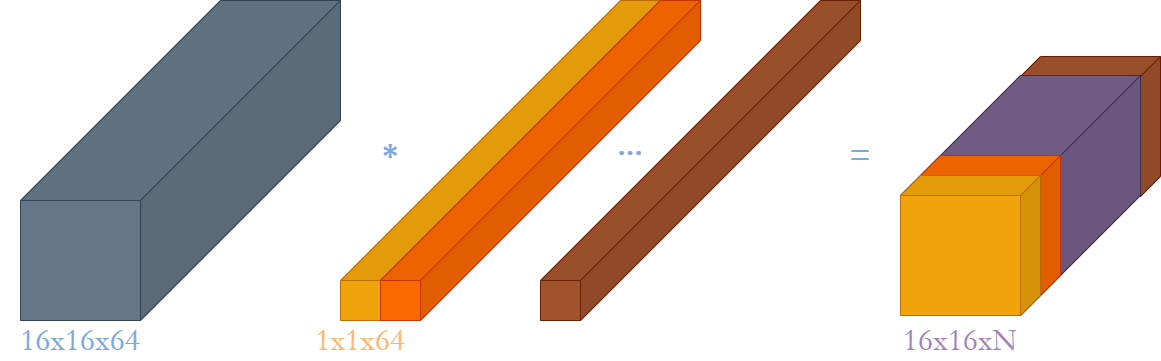

1x1 convolutions are referred to as projection layers because they can be thought of as linear (affine) transformation that project each channel vector from the input activation volume into a lower dimensional space as shown in the figure below.

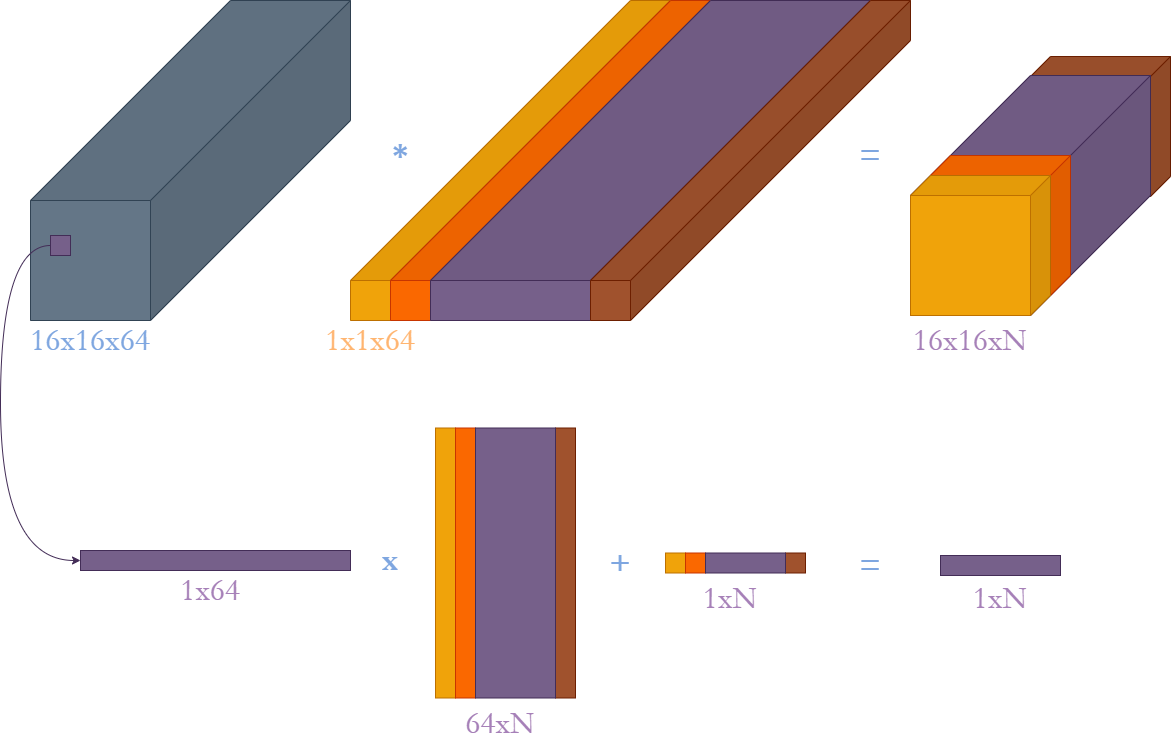

### Global Average Pooling

Normally, the feature maps of the last convolutional layer are vectorized and fed into fully connected layers followed by a softmax logistic regression layer. This structure bridges the convolutional structure with traditional neural networks. It treats the convolutional layers as feature extractors, and the resulting feature is classified in a traditional way. 

As shown in the figure below, global average pooling replaces the Flatten layers in CNNs. It takes the average of each feature map, and the resulting vector is fed directly into the softmax layer. 

Advantages:

- There are no parameter to optimize in the global average pooling thus overfitting is avoided at this layer. 
- Global average pooling sums out the spatial information, thus it is more robust to spatial translations of the input.

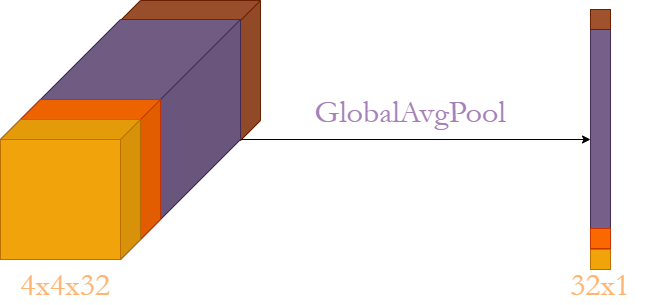